In [375]:
#!pip install kagglehub

In [376]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube")

print("Path to dataset files:", path)

Path to dataset files: /Users/mariabarbero/.cache/kagglehub/datasets/salvatorerastelli/spotify-and-youtube/versions/2


In [377]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
	
from sklearn.model_selection import train_test_split

In [379]:
spotify_youtube_completo_df = pd.read_csv(os.path.join(path, "Spotify_Youtube.csv"))

In [380]:
spotify_youtube__completo_df = spotify_youtube_completo_df.dropna(subset=["Stream"])

Eliminamos todas las filas donde el target (Stream) es nulo, ya que no pueden utilizarse para entrenar ni evaluar el modelo, dado que es la métrica que queremos predecir, cualquier observación sin este valor carece de utilidad para el entrenamiento del modelo.

In [381]:
train_df, test_df = train_test_split(
    spotify_youtube_completo_df,
    test_size=0.2,
    random_state=42
)

In [382]:
spotify_youtube_df = train_df

## Vamos a echar un primer vistazo a los datos:

In [383]:
spotify_youtube_df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
14718,14718,Cults,https://open.spotify.com/artist/3Oim8XBPbznAa8...,Gilded Lily,Offering,album,spotify:track:3Z0qLOS0cqWKPHXkbTXmNF,0.400,0.571,11.0,...,https://www.youtube.com/watch?v=78YgPoWGMBc,Cults - Gilded Lily (Official Lyric Video),CultsVEVO,908851.0,22312.0,323.0,"Official lyric video for Gilded Lily by Cults,...",True,True,83194819.0
6703,6703,Los Pericos,https://open.spotify.com/artist/7FnZWGw9lwOr7W...,Runaway,Pericos & Friends,album,spotify:track:0ZLakHzHWqUIlkeDa4i8aC,0.676,0.731,9.0,...,https://www.youtube.com/watch?v=do-SuB_JXf4,Los Pericos - Runaway,lalahportela,3289088.0,34012.0,638.0,Música do Album - Pampas Reggae (Reggae Music)...,False,False,101408935.0
5199,5199,Richard Marx,https://open.spotify.com/artist/0grdhNhiRLFBaF...,Satisfied,Repeat Offender,album,spotify:track:4V87hYB94wu8DFtd901riK,0.572,0.914,8.0,...,https://www.youtube.com/watch?v=7sOjdusDUzE,Richard Marx - Satisfied (Official Video),Richard Marx,1082921.0,8188.0,539.0,Become a Facebook Fan - http://on.fb.me/Richar...,False,True,4281404.0
8035,8035,David Guetta,https://open.spotify.com/artist/1Cs0zKBU1kc0i8...,Sexy Bitch (feat. Akon),One Love (Deluxe),album,spotify:track:0uXO2GrNiIb1xHT9LUdxZE,0.813,0.627,11.0,...,https://www.youtube.com/watch?v=N9hazmsUxrM,David Guetta Feat. Akon - Sexy Chick (Official...,David Guetta,218805079.0,1043980.0,NaN,BUY / LISTEN THE NEW DAVID GUETTA ALBUM NOW : ...,True,True,633115670.0
7881,7881,The Supremes,https://open.spotify.com/artist/57bUPid8xztkie...,Come See About Me,Where Did Our Love Go,album,spotify:track:307kcWJQNMdiYYKj1LgClU,0.732,0.506,7.0,...,https://www.youtube.com/watch?v=PycKSdKG_74,"The Supremes ""Come See About Me""",Petr Wab,9145289.0,44524.0,2838.0,"The Supreme's singing ""Come See About Me""",False,False,70357721.0


In [384]:
spotify_youtube_df.shape

(16574, 28)

In [385]:
spotify_youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16574 entries, 14718 to 15795
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16574 non-null  int64  
 1   Artist            16574 non-null  object 
 2   Url_spotify       16574 non-null  object 
 3   Track             16574 non-null  object 
 4   Album             16574 non-null  object 
 5   Album_type        16574 non-null  object 
 6   Uri               16574 non-null  object 
 7   Danceability      16573 non-null  float64
 8   Energy            16573 non-null  float64
 9   Key               16573 non-null  float64
 10  Loudness          16573 non-null  float64
 11  Speechiness       16573 non-null  float64
 12  Acousticness      16573 non-null  float64
 13  Instrumentalness  16573 non-null  float64
 14  Liveness          16573 non-null  float64
 15  Valence           16573 non-null  float64
 16  Tempo             16573 non-null  float64

In [386]:
spotify_youtube_df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,16574.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,1.657300e+04,1.620200e+04,1.614700e+04,1.612100e+04,1.612800e+04
mean,10349.545795,0.620729,0.634967,5.286007,-7.663725,0.096874,0.290654,0.055489,0.193821,0.528305,120.546343,2.235717e+05,9.430195e+07,6.695117e+05,2.802322e+04,1.369256e+08
std,5992.407456,0.165221,0.213862,3.573107,4.627963,0.112321,0.285244,0.192895,0.168686,0.245504,29.576401,1.081360e+05,2.734934e+08,1.794740e+06,1.997300e+05,2.456151e+08
min,0.000000,0.000000,0.000020,0.000000,-44.761000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5157.250000,0.519000,0.507000,2.000000,-8.822000,0.035900,0.045000,0.000000,0.094200,0.339000,96.953000,1.801470e+05,1.774813e+06,2.120250e+04,4.950000e+02,1.771384e+07
50%,10394.500000,0.638000,0.666000,5.000000,-6.521000,0.051000,0.194000,0.000002,0.126000,0.534000,119.971000,2.133070e+05,1.445134e+07,1.263780e+05,3.318000e+03,4.979139e+07
75%,15539.750000,0.741000,0.798000,8.000000,-4.929000,0.104000,0.475000,0.000453,0.238000,0.725000,139.932000,2.521070e+05,7.033248e+07,5.218210e+05,1.440700e+04,1.398249e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,0.997000,0.993000,236.059000,4.581483e+06,8.079647e+09,5.078863e+07,1.608314e+07,3.362005e+09


In [387]:
spotify_youtube_df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Instrumentalness      1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Url_youtube         372
Title               372
Channel             372
Views               372
Likes               427
Comments            453
Description         707
Licensed            372
official_video      372
Stream              446
dtype: int64

Tras revisar el dataset, las siguientes columnas no aportan información útil para el EDA ni para el modelado y pueden eliminarse:  

⁠Unnamed: 0 → índice exportado por error  
⁠Url_spotify → enlace, no aporta información analítica  
⁠Url_youtube → enlace, no aporta información analítica  
⁠Uri → identificador interno sin valor analítico  
⁠Description → texto libre, muy incompleto y no cuantitativo  
Title → Identificador de la canción de youtube, ya tenemos esos datos recogidos antes con la columna track  
Channel → canal de youtube del vídeo, no aporta información analítica

In [388]:
spotify_youtube_df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Instrumentalness      1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Url_youtube         372
Title               372
Channel             372
Views               372
Likes               427
Comments            453
Description         707
Licensed            372
official_video      372
Stream              446
dtype: int64

In [389]:
spotify_youtube_df= spotify_youtube_df.drop(['Unnamed: 0', 'Url_spotify', 'Url_youtube', 'Uri', 'Description','Title', 'Channel'],axis=1)

In [390]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

## Vamos a estudiar las columnas, los datos que nos aportan y si hay valores erróneos:


### Artist, Track y Album 
Columnas que identifican de manera única cada dato. Además, como podemos ver anteriormente,  no tienen valores nulos luego no necesitamos modificarlas ni eliminarlas

### Album_type
La columna nos indica cómo se ha sacado la canción (como single, album o recopilación), de esta forma, podemos obtener informacion útil sobre la mejor manera de sacar una canción para que triunfe

In [391]:
spotify_youtube_df['Album_type'].unique()


array(['album', 'single', 'compilation'], dtype=object)

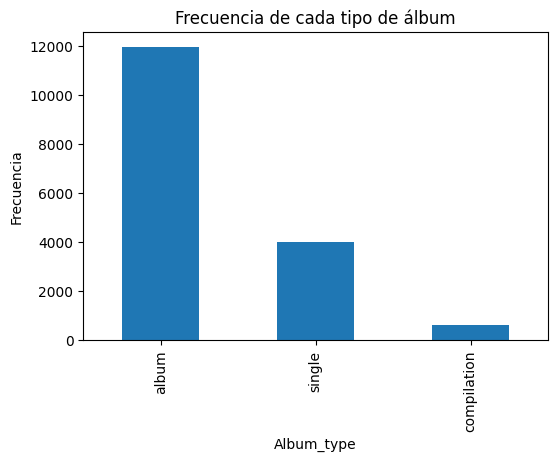

In [392]:
spotify_youtube_df["Album_type"].value_counts().plot(
    kind="bar",
    figsize=(6,4))
plt.title("Frecuencia de cada tipo de álbum")
plt.xlabel("Album_type")
plt.ylabel("Frecuencia")
plt.show()

Visualizamos la variable Album_type en un grafico de barras para ver la distribución de las canciones, la mayoría pertenecen a álbumes (14926), mientras que los
singles (5004) son menos frecuentes y las compilaciones (788) aparecen en muy poca cantidad.



### Danceability 
Permite ver cómo de buena es una canción para bailarla, los datos se recogen entre 0 y 1

In [393]:
spotify_youtube_df['Danceability'].describe()


count    16573.000000
mean         0.620729
std          0.165221
min          0.000000
25%          0.519000
50%          0.638000
75%          0.741000
max          0.975000
Name: Danceability, dtype: float64

Corroboramos que no tenemos datos fuera del rango pues se ve el mínimo es 0 y el máximo 0.975

### Energy 
Mide la energia en el rango [0.0 ; 1.0] representa la intensidad y la actividad, en funcion de si ees más energetico, ruidoso o alta. 
Musica clasica tendrá valores mas cercanos a 0

In [394]:
spotify_youtube_df[
    (spotify_youtube_df["Energy"] < 0) |
    (spotify_youtube_df["Energy"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


No hay valores fuera de rango (también podíamos haber visto el .describe)

### Key
Esta columna recoge la tonalidad en la que está la pista. Sigue la notación Pitch Class.  
Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente.  
Si no se detecta ninguna tonalidad, el valor es -1.

In [395]:
spotify_youtube_df['Key'].value_counts()

Key
0.0     1845
7.0     1769
1.0     1762
2.0     1640
9.0     1579
5.0     1392
11.0    1339
4.0     1251
8.0     1206
6.0     1144
10.0    1118
3.0      528
Name: count, dtype: int64

Vemos que no está el valor -1, luego no hay missing values.  
Como esta columna nos da en realidad una tonalidad, no nos interesa que esté en tipo float porque ocupa espacio de almacenamiento y solo tiene números enteros. Vamos a sustituirlo directamente por el tono musical al que corresponde el número.

In [396]:
diccionario_notas = {
    0: "C",
    1: "C# / Db",
    2: "D",
    3: "D# / Eb",
    4: "E",
    5: "F",
    6: "F# / Gb",
    7: "G",
    8: "G# / Ab",
    9: "A",
    10: "A# / Bb",
    11: "B"
}

In [397]:
spotify_youtube_df["Key"] = spotify_youtube_df["Key"].replace(diccionario_notas)

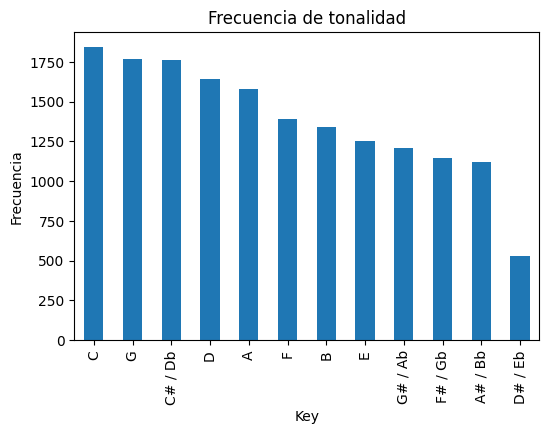

In [398]:
spotify_youtube_df["Key"].value_counts().plot(
    kind="bar",
    figsize=(6,4))
plt.title("Frecuencia de tonalidad")
plt.xlabel("Key")
plt.ylabel("Frecuencia")
plt.show()

Generamos un grafico para visualizar que se ha sustituido correctamente por su tono musical y tambien obtener una visión clara de las tonalidades más utilizadas en las canciones del dataset como el tono C (2305) y tono G (2252)

### Loudness
Representa la sonoridad global de una canción medida en decibelios (dB). Este valor se calcula como una media a lo largo de toda la pista y permite comparar la intensidad sonora entre diferentes canciones.  
Los valores de Loudness suelen estar comprendidos entre –60 dB y 0 dB:  
⁠Canciones con valores alrededor de –60 dB son muy suaves o acústicas.  
⁠Canciones con valores cercanos a 0 dB son muy intensas, comprimidas y típicas de géneros más comerciales o electrónicos.

In [399]:
spotify_youtube_df["Loudness"].describe()

count    16573.000000
mean        -7.663725
std          4.627963
min        -44.761000
25%         -8.822000
50%         -6.521000
75%         -4.929000
max          0.920000
Name: Loudness, dtype: float64

In [400]:
spotify_youtube_df[
    (spotify_youtube_df["Loudness"] < -60) |
    (spotify_youtube_df["Loudness"]  > 0)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
12543,French Montana,Welcome to the Party (with French Montana & Li...,Welcome to the Party (with French Montana & Li...,single,0.618,0.845,D,0.175,0.1320,0.1140,...,0.4150,0.486,171.921,181720.0,207546580.0,2385757.0,69474.0,False,True,238992070.0
9423,Sub Focus,Siren,Solar System / Siren,single,0.486,0.986,F,0.920,0.0620,0.1180,...,0.2190,0.241,173.983,256000.0,1042170.0,16584.0,329.0,True,True,14126273.0
15187,Shilpi Raj,Le Le Aayi Coca Cola,Le Le Aayi Coca Cola,single,0.716,0.962,F,0.561,0.1010,0.3570,...,0.1890,0.857,114.993,277569.0,327570837.0,2109990.0,107962.0,True,True,3667356.0
10578,"Sergio Vega ""El Shaka""",Me Gusta Estar Contigo,Me Gusta Estar Contigo,album,0.888,0.741,F,0.522,0.0573,0.4950,...,0.0533,0.968,105.789,138467.0,4976974.0,6740.0,191.0,False,False,25302700.0
11826,Cascada,Everytime We Touch - Fallen Superhero Remix,Everytime We Touch (Fallen Superhero Remix),single,0.610,0.971,F# / Gb,0.006,0.1690,0.0641,...,0.3380,0.487,150.089,218587.0,6967544.0,59878.0,636.0,False,False,12159973.0


Estas seis filas deben eliminarse porque los valores de Loudness están fuera del rango válido para una canción (–60 dB a 0 dB), por
tanto, representan datos erróneos y eliminarlos mejora la calidad del análisis.

In [401]:
spotify_youtube_df = spotify_youtube_df[(spotify_youtube_df['Loudness'] >= -60) & (spotify_youtube_df['Loudness'] <= 0)]


### Speechiness
Esta columna nos indica la presencia de palabras en una canción, los valores cercanos a 1 son las pistas completamente habladas, como por ejemplo un audio libro.
los valores en el rango [0.33 ; 0.66] combinan música y voz, por otro lado los valores por debajo de 0.33, su contenido sera principalmente musical.
Esto es especialmente útil si queremos filtrar o segmentar canciones según su estilo o presencia de voz hablada, no modificamos el contenido

In [402]:
spotify_youtube_df[
    (spotify_youtube_df["Speechiness"] < 0) |
    (spotify_youtube_df["Speechiness"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [403]:
spotify_youtube_df['Speechiness'].describe()

count    16568.000000
mean         0.096872
std          0.112336
min          0.000000
25%          0.035900
50%          0.050900
75%          0.104000
max          0.964000
Name: Speechiness, dtype: float64

In [404]:
spotify_youtube_df[spotify_youtube_df['Speechiness'] == spotify_youtube_df['Speechiness'].min()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
13844,White Noise for Babies,Shower Sound - Loopable Without Fade,White Noise,album,0.0,0.251000,D,-25.004,0.0,0.11900,...,0.3840,0.0,0.0,62850.0,17140.0,40.0,0.0,True,True,48053292.0
15597,White Noise Baby Sleep,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,A# / Bb,-21.995,0.0,0.92100,...,0.1140,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0
9358,Ocean Waves For Sleep,Beach Waves and Soothing Brown Noise,Soothing Brown Noise Waves and Calming Ambient...,album,0.0,0.000252,A,-17.746,0.0,0.00948,...,0.8060,0.0,0.0,93452.0,328.0,1.0,0.0,True,True,54256600.0
15595,White Noise Baby Sleep,White Noise Relaxation for Calming Down Fussy ...,White Noise for Sleeping Babies,album,0.0,0.373000,A# / Bb,-16.469,0.0,0.15300,...,0.7260,0.0,0.0,593754.0,376087.0,561.0,0.0,True,True,15110333.0
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,A# / Bb,-21.995,0.0,0.92100,...,0.1140,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0
7187,Luciano Pavarotti,"Rigoletto / Act 3: ""La donna è mobile"" - Live",The Three Tenors - The Best of the 3 Tenors,compilation,0.0,0.402000,F,-15.718,0.0,0.97200,...,0.8970,0.0,0.0,151253.0,31017254.0,204651.0,9002.0,False,False,1995393.0
15590,White Noise Baby Sleep,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,C# / Db,-27.592,0.0,0.90800,...,0.1110,0.0,0.0,72223.0,290014.0,674.0,0.0,True,True,128701242.0
2073,Louis Armstrong,"Hello, Dolly!","Hello, Dolly! (Remastered)",album,0.0,0.405000,C,-9.935,0.0,0.84200,...,0.1980,0.0,0.0,147000.0,12691825.0,98026.0,4050.0,False,False,22358910.0
13845,White Noise for Babies,"Soothing White Noise - Loopable, No Fade",White Noise,album,0.0,0.001250,C# / Db,-27.592,0.0,0.90800,...,0.1110,0.0,0.0,72223.0,157884163.0,483072.0,30861.0,True,True,71571206.0
9266,Lang Lang,The Departure,Voyager - Essential Max Richter,album,0.0,0.036200,C,-22.519,0.0,0.99400,...,0.0958,0.0,0.0,151507.0,185634.0,1796.0,20.0,True,True,11902123.0


Vemos que el valor máximo de Speechiness corresponden a grabaciones de ruido blanco o sonidos relajantes para dormir bebés, ya que son contenido sonoro predominantemente no musical.

In [405]:
spotify_youtube_df[spotify_youtube_df['Speechiness'] == spotify_youtube_df['Speechiness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
5158,Sir Arthur Conan Doyle,Teil 7 - Sherlock Holmes und der blinde Bettle...,Sherlock Holmes und der blinde Bettler [Die ne...,album,0.625,0.257,C# / Db,-15.375,0.964,0.115,...,0.283,0.349,170.97,180202.0,27263.0,535.0,14.0,True,True,10540.0


### Acousticness 
Esta columna mide la probabilidad de que una pista sea acustica medida en el rango entre [0.0 ; 1.0], 
1.0 la pista será con un 100% de probabilidad acústica y 0.0 no habrá probabilidad de que sea acústica


In [406]:
spotify_youtube_df['Acousticness'].describe()

count    16568.000000
mean         0.290672
std          0.285271
min          0.000001
25%          0.045000
50%          0.194000
75%          0.475000
max          0.996000
Name: Acousticness, dtype: float64

In [407]:
spotify_youtube_df[spotify_youtube_df['Acousticness'] == spotify_youtube_df['Acousticness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
14941,C418,Wet Hands,Minecraft - Volume Alpha,album,0.616,0.03500,A,-25.836,0.0432,0.996,...,0.0835,0.6430,147.712,90000.0,3650617.0,105153.0,2539.0,True,True,55009250.0
5358,Robert Schumann,"Kinderszenen, Op. 15: 7. Träumerei",Schumann: Kreisleriana; Kinderszenen; Fantasie...,album,0.404,0.01510,F,-35.799,0.0652,0.996,...,0.0946,0.2820,134.935,150600.0,415188.0,5252.0,102.0,False,False,8683089.0
9027,Aphex Twin,Avril 14th,Drukqs,album,0.558,0.02590,G# / Ab,-30.016,0.0458,0.996,...,0.0969,0.3700,157.811,125520.0,3831690.0,25186.0,4180.0,False,False,149358376.0
7219,John Powell,P.S. I Love You,P.S. I Love You,album,0.462,0.02940,C,-28.156,0.0481,0.996,...,0.0851,0.3880,79.459,83293.0,38040.0,338.0,4.0,True,True,13181774.0
4060,Erik Satie,3 Gymnopédies: No. 1 Lent et douloureux,Satie: The Magic of Satie,album,0.590,0.00399,G,-36.497,0.2420,0.996,...,0.0683,0.1820,74.381,219760.0,40003899.0,691633.0,39823.0,False,False,12716957.0
5360,Robert Schumann,"Schumann: Kinderszenen, Op. 15: No. 1, Von fre...","Schumann : Kinderszenen, Waldszenen & Bunte Bl...",album,0.279,0.00647,G,-38.339,0.0577,0.996,...,0.1030,0.2370,67.454,100267.0,223774.0,1685.0,44.0,False,False,2110799.0
5356,Robert Schumann,"Kinderszenen, Op. 15: 1. Von fremden Ländern u...",Schumann: Kinderszenen; Kreisleriana,album,0.282,0.00199,G,-41.932,0.0515,0.996,...,0.0625,0.3240,127.892,113240.0,223774.0,1685.0,44.0,False,False,9719644.0
4056,Erik Satie,Gnossienne No. 1,Gnossienne No. 1,single,0.376,0.00579,F,-31.615,0.0576,0.996,...,0.0882,0.0369,71.827,296480.0,10545759.0,173981.0,9535.0,False,False,43255565.0
9782,Max Richter,A Catalogue of Afternoons,The Blue Notebooks (15 Years),album,0.124,0.09240,B,-31.726,0.0412,0.996,...,0.0935,0.1350,205.999,110880.0,170969.0,1963.0,69.0,True,True,74484448.0
4290,Johannes Brahms,"16 Waltzes, Op. 39 (1867 version): No. 15 in A...",Brahms: Waltzes / Cadenzas / Die Schone Magelone,album,0.406,0.00620,A,-39.131,0.0573,0.996,...,0.0664,0.2160,79.377,85240.0,222713.0,3199.0,149.0,True,True,969788.0


Comprobamos que todos los valores se encuentran dentro del rango válido, por lo que no hay registros que eliminar. Además revisamos las pistas con valores más altos de Acousticness, confirmando que corresponden a canciones predominantemente acústicas. 

### Instrumentalness
Es la columna encagada de indicar si una pista no contiene voces, detecta sonidos como 'oooh' como instrumentales, en este caso, canciones de rap se considerarán totalmente vocales y los valores cercanos a 1.0 indicaran una alta probabilidad de que la pista no tenga contenido vocal.

In [408]:
spotify_youtube_df['Instrumentalness'].describe()


count    16568.000000
mean         0.055465
std          0.192861
min          0.000000
25%          0.000000
50%          0.000002
75%          0.000454
max          1.000000
Name: Instrumentalness, dtype: float64

In [409]:
spotify_youtube_df[spotify_youtube_df['Instrumentalness'] == spotify_youtube_df['Instrumentalness'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
15597,White Noise Baby Sleep,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,A# / Bb,-21.995,0.0,0.921,...,0.114,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0
13842,White Noise for Babies,Air Conditioner - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.000055,A# / Bb,-21.995,0.0,0.921,...,0.114,0.0,0.0,108527.0,407.0,1.0,0.0,True,True,26677287.0
15590,White Noise Baby Sleep,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,C# / Db,-27.592,0.0,0.908,...,0.111,0.0,0.0,72223.0,290014.0,674.0,0.0,True,True,128701242.0
13845,White Noise for Babies,"Soothing White Noise - Loopable, No Fade",White Noise,album,0.0,0.001250,C# / Db,-27.592,0.0,0.908,...,0.111,0.0,0.0,72223.0,157884163.0,483072.0,30861.0,True,True,71571206.0
13848,White Noise for Babies,"Clean White Noise - Loopable, No Fade",Relaxing Loopable White Noise,single,0.0,0.003420,G# / Ab,-28.460,0.0,0.791,...,0.111,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,26018007.0
13840,White Noise for Babies,Pure Brown Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.001250,C# / Db,-27.592,0.0,0.908,...,0.111,0.0,0.0,72223.0,2329675.0,11249.0,597.0,True,True,128701242.0
15588,White Noise Baby Sleep,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,G# / Ab,-28.460,0.0,0.791,...,0.111,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,956435715.0
13839,White Noise for Babies,Clean White Noise - Loopable with no fade,Best White Noise for Baby Sleep - Loopable wit...,album,0.0,0.003420,G# / Ab,-28.460,0.0,0.791,...,0.111,0.0,0.0,90228.0,1492.0,18.0,0.0,True,True,956435715.0


In [410]:
spotify_youtube_df[spotify_youtube_df['Instrumentalness']>0.1]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
1038,Korn,Freak On a Leash,Follow The Leader,album,0.353,0.8980,D,-5.877,0.0520,0.000022,...,0.3900,0.5250,103.293,255733.0,261866868.0,1452692.0,44509.0,True,True,343955425.0
7988,Rammstein,Deutschland,Rammstein,album,0.521,0.8950,G,-5.242,0.0442,0.000055,...,0.0985,0.2370,120.117,322340.0,294820856.0,3566943.0,NaN,True,True,327410793.0
8470,Booba,KOA,KOA,single,0.789,0.6410,D,-5.402,0.1240,0.156000,...,0.1620,0.3190,125.016,187791.0,5486940.0,79777.0,5140.0,False,False,8198481.0
11092,Freshlyground,Nomvula (After the Rain),Nomvula,album,0.709,0.2950,F# / Gb,-11.755,0.0323,0.744000,...,0.1050,0.4180,122.270,283827.0,1182527.0,11327.0,819.0,True,True,991119.0
4999,Ennio Morricone,Nuovo Cinema Paradiso,Nuovo Cinema Paradiso (Original Motion Picture...,album,0.274,0.1480,A# / Bb,-16.815,0.0367,0.989000,...,0.1210,0.1880,127.323,178667.0,28573747.0,144491.0,6015.0,True,True,16699676.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9268,Lang Lang,"Liebestraum No. 3 in A-Flat Major, S. 541 / 3",Liszt - My Piano Hero,album,0.279,0.0292,G# / Ab,-26.804,0.0406,0.987000,...,0.1040,0.0338,136.732,293147.0,3220290.0,31401.0,1886.0,True,True,30172189.0
8529,TOOL,Sober,Undertow,album,0.385,0.6730,D,-8.182,0.0329,0.000183,...,0.0721,0.1870,149.271,306853.0,48632483.0,365294.0,11410.0,True,True,87821039.0
4297,Academy of St. Martin in the Fields,Mozart: Concerto For Clarinet And Orchestra In...,Out Of Africa (Music From The Motion Picture S...,compilation,0.107,0.0153,D,-27.871,0.0469,0.984000,...,0.0659,0.0781,83.717,170000.0,17040561.0,113390.0,6021.0,True,True,2865633.0
11653,Ramin Djawadi,A Lannister Always Pays His Debts,Game Of Thrones: Season 3 (Music from the HBO ...,album,0.288,0.2880,D,-16.518,0.0402,0.552000,...,0.1710,0.0963,86.393,170560.0,2028063.0,19119.0,1127.0,False,False,38705608.0


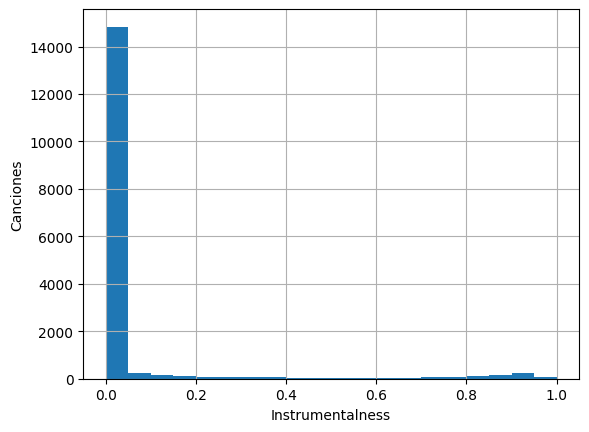

In [411]:
import matplotlib.pyplot as plt

spotify_youtube_df['Instrumentalness'].hist(bins=20)
plt.xlabel('Instrumentalness')
plt.ylabel('Canciones')
plt.show()

Decidimos eliminar la columna dado que la gran mayoria de los valores estan concentrados en 0, prácticamente todas las canciones contienen voces. Esto nos indica que la columna no aporta informacion relevante ni podemos obtener conclusiones significas

In [412]:
spotify_youtube_df = spotify_youtube_df.drop('Instrumentalness', axis=1)


### Liveness 
Esta columna mide de 0 a 1 la presencia de público en el momento de la grabación de la canción.  
Si se acerca a 1 implica que es una canción grabada en directo.

In [413]:
spotify_youtube_df['Liveness'].describe()

count    16568.000000
mean         0.193806
std          0.168696
min          0.014500
25%          0.094200
50%          0.125000
75%          0.238000
max          0.997000
Name: Liveness, dtype: float64

Como vemos, los valores que toma tienen sentido y están dentro de rango.

### Valance 
Mide cuanto de positiva o negativa es emocionalmente una canción. Su valor va de
0.0 a 1.0, donde:

⁠0.0 → canciones tristes, tensas o melancólicas  
1.0 → canciones alegres, optimistas o eufóricas  

Por tanto, cualquier valor menor que 0 o mayor que 1 se considera erróneo.

In [414]:
spotify_youtube_df["Valence"].describe()

count    16568.000000
mean         0.528281
std          0.245494
min          0.000000
25%          0.339000
50%          0.534000
75%          0.725000
max          0.993000
Name: Valence, dtype: float64

In [415]:
spotify_youtube_df[
    (spotify_youtube_df["Valence"] < 0) |
    (spotify_youtube_df["Valence"] > 1)
]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream



### Tempo 
Recogemos los BPM de la canción, es decir, la velocidad a la que va la canción

In [416]:
spotify_youtube_df['Tempo'].describe()

count    16568.000000
mean       120.539460
std         29.574112
min          0.000000
25%         96.949000
50%        119.971000
75%        139.931250
max        236.059000
Name: Tempo, dtype: float64

Vemos que no hay valores negativos lo que implica que los datos son correctos. Además, el máximo que es 243.37 nos parece un tempo razonable, luego no hay outliers.  
Hemos decidido añadir una columna para entender mejor los datos. Ejemplo: Si Tempo es 29.57 en la nueva columna Tempo_category se recoge como Grave, que en términos musicales implica que va bastante lento.

In [417]:
def classify_tempo(bpm):
    if bpm < 24:
        return 'Larghissimo'
    elif bpm < 46:
        return 'Grave'
    elif bpm < 61:
        return 'Lento / Largo'
    elif bpm < 77:
        return 'Adagio'
    elif bpm < 109:
        return 'Andante'
    elif bpm < 121:
        return 'Moderato / Allegretto'
    elif bpm < 157:
        return 'Allegro'
    elif bpm < 177:
        return 'Vivace'
    elif bpm < 201:
        return 'Presto'
    else:
        return 'Prestissimo'

In [418]:
spotify_youtube_df['Tempo_category'] = spotify_youtube_df['Tempo'].apply(classify_tempo)
spotify_youtube_df['Tempo_category']

14718     Adagio
6703     Allegro
5199     Andante
8035     Allegro
7881     Allegro
          ...   
11284    Andante
11964    Andante
5390     Andante
860       Presto
15795    Allegro
Name: Tempo_category, Length: 16568, dtype: object

Vamos a ordenar la nueva columna creada para ponerla al lado de la de 'Tempo', para una mejora en la lectura de los catos

In [419]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Licensed',
       'official_video', 'Stream', 'Tempo_category'],
      dtype='object')

In [420]:
spotify_youtube_df = spotify_youtube_df[['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Licensed',
       'official_video', 'Stream']]

In [421]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Licensed', 'official_video', 'Stream'],
      dtype='object')

Vamos a analizar de manera análoga las variables: 
### ⁠Views
Número total de visualizaciones del vídeo en YouTube.  
### ⁠Likes 
Número de "me gusta" que ha recibido el vídeo en YouTube.  
### ⁠Comments
Número de comentarios publicados en el vídeo de YouTube.    
### ⁠Duration_ms
Duración total de la canción en milisegundos.

Todas estas variables son cuantitativas, de tipo numérico y deben tomar valores
mayores o iguales a 0, ya que no es posible tener visualizaciones, likes o streams
negativos. Valores negativos o extremadamente atípicos se considerarían erróneos.

In [422]:
spotify_youtube_df["Views"].describe()

count    1.619700e+04
mean     9.429723e+07
std      2.735253e+08
min      0.000000e+00
25%      1.774331e+06
50%      1.445173e+07
75%      7.032787e+07
max      8.079647e+09
Name: Views, dtype: float64

In [423]:
spotify_youtube_df[spotify_youtube_df["Views"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [424]:
spotify_youtube_df["Likes"].describe()

count    1.614200e+04
mean     6.694354e+05
std      1.794910e+06
min      0.000000e+00
25%      2.121075e+04
50%      1.263820e+05
75%      5.217912e+05
max      5.078863e+07
Name: Likes, dtype: float64

In [425]:
spotify_youtube_df[spotify_youtube_df["Likes"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [426]:
spotify_youtube_df["Comments"].describe()

count    1.611600e+04
mean     2.802084e+04
std      1.997594e+05
min      0.000000e+00
25%      4.950000e+02
50%      3.319500e+03
75%      1.440250e+04
max      1.608314e+07
Name: Comments, dtype: float64

In [427]:
spotify_youtube_df[spotify_youtube_df["Comments"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


In [428]:
spotify_youtube_df[spotify_youtube_df["Duration_ms"] < 0]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream


Vemos que no hay valores erróneos en estas variables.

### Licensed 
Es una variable boleana. Recoge el valor True si es un vídeo con licencia, y False si no lo es. Hemos visto arriba que tiene 470 valores nulos. Vamos a imputarlos por False, pues creemos que si no podemos saber si tiene licencia implica que no la tiene.

In [429]:
spotify_youtube_df["Licensed"] = spotify_youtube_df["Licensed"].fillna(False)
spotify_youtube_df['Licensed'].value_counts()

/var/folders/04/tq0r9d3s5bv_b58wf9px7_mh0000gn/T/ipykernel_53344/3252406557.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_youtube_df["Licensed"] = spotify_youtube_df["Licensed"].fillna(False)


Licensed
True     11290
False     5278
Name: count, dtype: int64

### Official video
Similar a License, es una variable booleana con algunos missing values. Esta variable mide si el vídeo de youtube es el vídeo oficial o no. Vamos a imputar los missings por False porque entendemos que si no se puede saber si es el vídeo oficial o no, entonces no lo es.

In [430]:
spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(False)
spotify_youtube_df['official_video'].value_counts()

/var/folders/04/tq0r9d3s5bv_b58wf9px7_mh0000gn/T/ipykernel_53344/2814527519.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_youtube_df['official_video'] = spotify_youtube_df['official_video'].fillna(False)


official_video
True     12570
False     3998
Name: count, dtype: int64

### Stream
Indica el número de reproducciones de cada canción en Spotify. Es una medida directa para avaluar la popularidad o el alcance de una cancion 

In [431]:
spotify_youtube_df['Stream'].describe()


count    1.612200e+04
mean     1.369493e+08
std      2.456518e+08
min      6.574000e+03
25%      1.772387e+07
50%      4.979139e+07
75%      1.398086e+08
max      3.362005e+09
Name: Stream, dtype: float64

In [432]:
spotify_youtube_df[spotify_youtube_df['Stream'] == spotify_youtube_df['Stream'].max()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,C# / Db,-3.183,0.0802,0.581,...,0.931,95.977,Andante,233713.0,5.908398e+09,31047780.0,1130327.0,True,True,3.362005e+09


In [433]:
spotify_youtube_df[spotify_youtube_df['Stream'] == spotify_youtube_df['Stream'].min()]


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
8701,I Virtuosi Italiani,Rainbows,Rainbows,single,0.337,0.328,C,-14.185,0.033,0.948,...,0.0388,75.435,Adagio,229248.0,446.0,15.0,2.0,True,True,6574.0


Para una mejora en la comprension y facilitar la lectura y comprension de los datos, dado que la variable 'Stream' nos proporciona informacion sobre los datos de Spotify, lo colocaremos junto a estos y no separado con los de Youtube

In [434]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [435]:
spotify_youtube_df= spotify_youtube_df[['Artist', 'Track', 'Album', 'Album_type', 'Stream', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Valence',
       'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Licensed', 'official_video']]

In [436]:
spotify_youtube_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Stream', 'Danceability',
       'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness',
       'Valence', 'Tempo', 'Tempo_category', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'official_video'],
      dtype='object')

## Missing values
Ya hemos imputado las variables Licensed y Official video, vamos a estudiar qué podemos hacer con el resto de variables con missings

In [437]:
spotify_youtube_df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Stream            446
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Liveness            0
Valence             0
Tempo               0
Tempo_category      0
Duration_ms         0
Views             371
Likes             426
Comments          452
Licensed            0
official_video      0
dtype: int64

Dado que los missing values son en las variables Views, Likes, Comments, incluso en el propio target Stream siendo estas variables decisivas en nuestro dataset, vamos a estudiar cuál es el % de filas a las que les faltan uno de estos datos.

In [438]:
missings= spotify_youtube_df[spotify_youtube_df.isnull().any(axis=1)]
missings

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Loudness,Speechiness,...,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video
8035,David Guetta,Sexy Bitch (feat. Akon),One Love (Deluxe),album,633115670.0,0.813,0.627,B,-5.018,0.0486,...,0.1310,0.801,130.011,Allegro,195853.0,218805079.0,1043980.0,NaN,True,True
7988,Rammstein,Deutschland,Rammstein,album,327410793.0,0.521,0.895,G,-5.242,0.0442,...,0.0985,0.237,120.117,Moderato / Allegretto,322340.0,294820856.0,3566943.0,NaN,True,True
16137,Matheus & Kauan,Quarta Cadeira - Ao Vivo,Tem Moda Pra Tudo (Ao Vivo),album,174400674.0,0.565,0.820,F,-5.031,0.2430,...,0.6210,0.604,76.471,Adagio,224002.0,NaN,NaN,NaN,False,False
4193,Caetano Veloso,Reconvexo - Ao Vivo,Ofertório (Ao Vivo),album,NaN,0.512,0.573,D,-11.295,0.1770,...,0.9380,0.703,177.849,Presto,200046.0,22580609.0,116839.0,2962.0,True,True
8538,Billy Idol,Eyes Without A Face,Rebel Yell,album,NaN,0.391,0.815,A,-6.197,0.0518,...,0.2760,0.647,84.383,Andante,299240.0,259236899.0,1223698.0,55763.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Rammstein,Du hast,Sehnsucht,album,403740563.0,0.640,0.922,A,-6.283,0.0385,...,0.3320,0.716,125.105,Allegro,234227.0,484354563.0,2731596.0,NaN,True,True
3943,Ol' Dirty Bastard,Old Man,No Said Date,album,NaN,0.697,0.826,C,-4.719,0.3770,...,0.0699,0.504,104.003,Andante,166227.0,230202.0,4421.0,194.0,False,False
1585,Scorpions,Always Somewhere,Lovedrive,album,NaN,0.511,0.371,C,-12.074,0.0298,...,0.1120,0.185,113.998,Moderato / Allegretto,297733.0,200040.0,2443.0,86.0,False,False
8792,Stone Temple Pilots,Creep - 2017 Remaster,Core (Super Deluxe Edition),album,NaN,0.662,0.485,E,-9.161,0.0304,...,0.0860,0.171,107.767,Andante,334387.0,3395649.0,56301.0,401.0,True,True


Hay 1167 filas con valores nulos, de 20710 que es el total de filas

In [439]:
print( 'El porcentaje de filas con valores nulos es:' , 1167/20710*100, '%')

El porcentaje de filas con valores nulos es: 5.634958957025591 %


Teniendo en cuenta que tan solo se trata de un 5% de nuestros datos aproximadamenta, consideramos que es más adecuado eliminar las columnas que trabajar con datos imputados que puedan ser erroneos o no sean un reflejo realista de la muestra

In [440]:
spotify_youtube_df = spotify_youtube_df.drop(missings.index)


In [441]:
spotify_youtube_df.isnull().sum()

Artist            0
Track             0
Album             0
Album_type        0
Stream            0
Danceability      0
Energy            0
Key               0
Loudness          0
Speechiness       0
Acousticness      0
Liveness          0
Valence           0
Tempo             0
Tempo_category    0
Duration_ms       0
Views             0
Likes             0
Comments          0
Licensed          0
official_video    0
dtype: int64

In [442]:
spotify_youtube_df.shape

(15655, 21)

In [443]:
spotify_youtube_df.head()

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Loudness,Speechiness,...,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Views,Likes,Comments,Licensed,official_video
14718,Cults,Gilded Lily,Offering,album,83194819.0,0.400,0.571,B,-6.534,0.0288,...,0.5190,0.146,61.859,Adagio,212736.0,908851.0,22312.0,323.0,True,True
6703,Los Pericos,Runaway,Pericos & Friends,album,101408935.0,0.676,0.731,A,-5.253,0.0368,...,0.6240,0.812,150.151,Allegro,233268.0,3289088.0,34012.0,638.0,False,False
5199,Richard Marx,Satisfied,Repeat Offender,album,4281404.0,0.572,0.914,G# / Ab,-8.436,0.0311,...,0.3190,0.843,108.991,Andante,254467.0,1082921.0,8188.0,539.0,False,True
7881,The Supremes,Come See About Me,Where Did Our Love Go,album,70357721.0,0.732,0.506,G,-11.735,0.0462,...,0.1460,0.867,126.325,Allegro,163093.0,9145289.0,44524.0,2838.0,False,False
14785,El Fantasma,Equipo RR,Equipo RR,single,13232046.0,0.755,0.550,G,-6.102,0.1070,...,0.0868,0.926,114.501,Moderato / Allegretto,159976.0,6411640.0,27111.0,357.0,False,False


## Outliers
Vamos a comprobar si existen outliers en nuestro DataFrame.
Para identificarlos utilizaremos boxplots, que permiten visualizar de forma clara el rango intercuartílico (IQR) y los valores que quedan fuera de los límites. En este proyecto nos centraremos en las métricas de popularidad (Streams, Views y Likes), ya que
son las que realmente pueden afectar al análisis

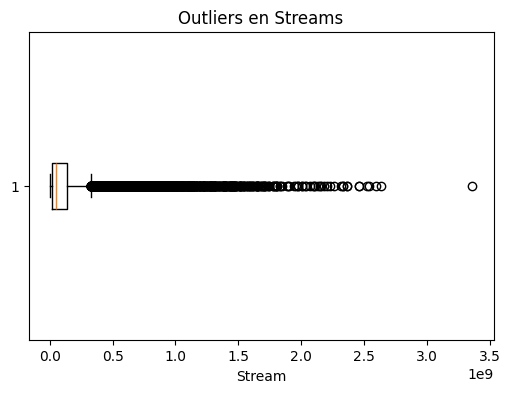

In [444]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Stream"].dropna(), vert=False)
plt.title("Outliers en Streams")
plt.xlabel("Stream")
plt.show()

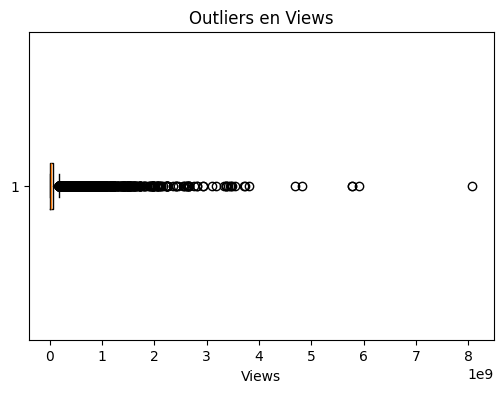

In [445]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Views"].dropna(), vert=False)
plt.title("Outliers en Views")
plt.xlabel("Views")
plt.show()

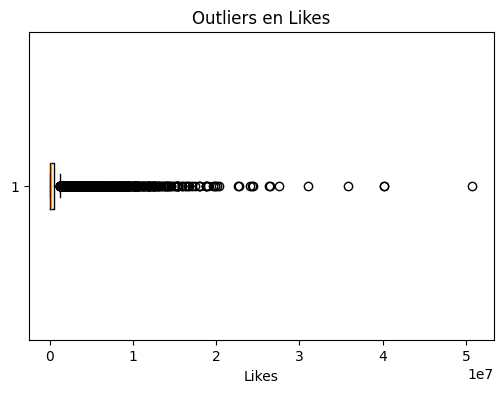

In [446]:
plt.figure(figsize=(6,4))
plt.boxplot(spotify_youtube_df["Likes"].dropna(), vert=False)
plt.title("Outliers en Likes")
plt.xlabel("Likes")
plt.show()

Mirando los outliers concluimos que los boxplots muestran muchos valores muy altos en Streams, Views y Likes, pero estos no
son errores, sino canciones extremadamente populares. Estas variables tienen
distribuciones de cola larga, por lo que la presencia de valores altos es totalmente
esperable. 

En el caso de Streams, revisamos manualmente tanto el valor
máximo como el mínimo y confirmamos que ambos eran válidos: el máximo correspondía a
una canción muy exitosa y el mínimo no era negativo. Solo se consideran outliers
inválidos los menores que 0, y en nuestra revisión en likes y views no apareció ninguno. Por tanto, no
es necesario eliminar ningún dato por outliers.


## Correlación
Para estudiar cómo se relacionan las variables numéricas entre sí, calculamos la matriz de correlación y lo representamos mediante un mapa de calor.

In [447]:
spotify_youtube_df.corr(numeric_only=True)

,Stream,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video
Stream,1.000000,0.071571,0.039142,0.117113,-0.018866,-0.100118,-0.039246,-0.013514,0.004076,-0.005743,0.608726,0.655765,0.260763,0.105237,0.104757
Danceability,0.071571,1.000000,0.234124,0.355498,0.231473,-0.275957,-0.081892,0.463337,-0.058367,-0.103014,0.085935,0.095431,0.041322,0.007572,0.034955
Energy,0.039142,0.234124,1.000000,0.748976,0.082769,-0.656589,0.172689,0.391622,0.171228,0.024329,0.064477,0.058491,0.040943,0.085895,0.111906
Loudness,0.117113,0.355498,0.748976,1.000000,0.068135,-0.551638,0.090714,0.317028,0.159568,0.010353,0.118123,0.122696,0.057393,0.101730,0.142742
Speechiness,-0.018866,0.231473,0.082769,0.068135,1.000000,-0.100542,0.058013,0.058503,0.048878,-0.058410,-0.012281,0.010125,0.009910,-0.063289,-0.056384
Acousticness,-0.100118,-0.275957,-0.656589,-0.551638,-0.100542,1.000000,-0.050309,-0.200984,-0.142459,-0.022464,-0.067839,-0.075964,-0.051574,-0.073335,-0.088208
Liveness,-0.039246,-0.081892,0.172689,0.090714,0.058013,-0.050309,1.000000,0.037110,0.009878,-0.002454,-0.018883,-0.024342,-0.012456,-0.000422,0.003517
Valence,-0.013514,0.463337,0.391622,0.317028,0.058503,-0.200984,0.037110,1.000000,0.094841,-0.062999,0.033446,0.008027,0.015925,0.010916,0.000143
Tempo,0.004076,-0.058367,0.171228,0.159568,0.048878,-0.142459,0.009878,0.094841,1.000000,-0.017159,-0.000876,0.004547,0.010059,0.006057,0.019380
Duration_ms,-0.005743,-0.103014,0.024329,0.010353,-0.058410,-0.022464,-0.002454,-0.062999,-0.017159,1.000000,0.032319,0.013811,0.000368,0.035828,0.009413


<Axes: >

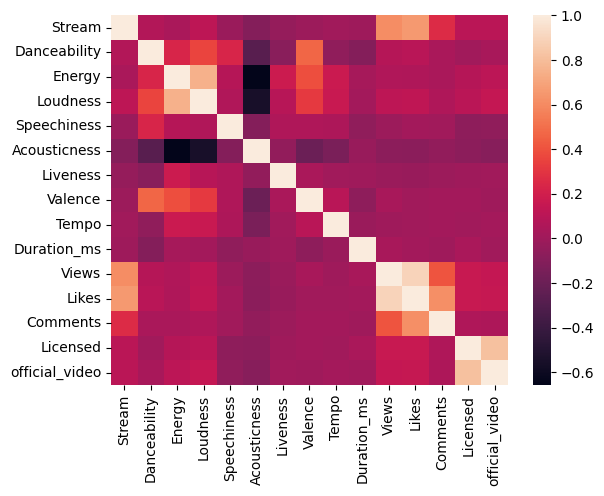

In [448]:
corr = spotify_youtube_df.corr(numeric_only=True)
sns.heatmap(corr)

La matriz de correlación y el mapa de calor muestra patrones claros entre las variables numericas:

- Métricas de YouTube (Views, Likes y Comments) están fuertemente correlacionadas entre sí, especialmente Views–Likes (0.89)  
- Streams en Spotify presenta correlación moderada Views (0.60) y con Likes (0.65), lo que indica que la popularidad suele ser similar en ambas plataformas.  
- Entre las características de audio destacan: 

    -Energy–Loudness (0.74), relación lógica entre intensidad y volumen.

    -Energy–Acousticness (–0.66), canciones acústicas tienden a ser menos energéticas.

    -Danceability–Valence (0.46), canciones más bailables suelen sonar más positivas.

- Variables como Tempo, Duration_ms, Liveness o Speechiness muestran poca relación con Streams, Views y Likes
- Licensed y official_video tienen alta correlación entre sí (0.81), como es esperable.

In [449]:
spotify_youtube_df = spotify_youtube_df.drop(["Views", "Likes", "Comments"], axis=1)


In [450]:
spotify_youtube_df.head()

,Artist,Track,Album,Album_type,Stream,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Tempo_category,Duration_ms,Licensed,official_video
14718,Cults,Gilded Lily,Offering,album,83194819.0,0.400,0.571,B,-6.534,0.0288,0.4680,0.5190,0.146,61.859,Adagio,212736.0,True,True
6703,Los Pericos,Runaway,Pericos & Friends,album,101408935.0,0.676,0.731,A,-5.253,0.0368,0.0438,0.6240,0.812,150.151,Allegro,233268.0,False,False
5199,Richard Marx,Satisfied,Repeat Offender,album,4281404.0,0.572,0.914,G# / Ab,-8.436,0.0311,0.0717,0.3190,0.843,108.991,Andante,254467.0,False,True
7881,The Supremes,Come See About Me,Where Did Our Love Go,album,70357721.0,0.732,0.506,G,-11.735,0.0462,0.6880,0.1460,0.867,126.325,Allegro,163093.0,False,False
14785,El Fantasma,Equipo RR,Equipo RR,single,13232046.0,0.755,0.550,G,-6.102,0.1070,0.6180,0.0868,0.926,114.501,Moderato / Allegretto,159976.0,False,False


In [451]:
spotify_youtube_df.shape

(15655, 18)

Durante el proceso de limpieza, eliminamos las variables 'views', 'likes' y 'comments', estas columnas representan medidas de interacción y popularidad obtenidas posteriormente a la publixaicon del contenido, es por esto que no resultan adecuadas para el objetivo de nuestro proyecto. 

El propósito del análisis es predecir eel número de reproducciones en Sportify(stram) utilizando únicamente información disponible antes del lanzamienot, fundamentalemnte características musicales y metadatos intrínsecos de la canción.

En caso de usar estas metricas podriamos tener problemas de fuga de información (Data Leakage), estas variables no están disponibles antes de su publicación y reflejan su rendimiento real o falta de relación causal con las características musicales, no aportan información sobre los atributos sonoros que buscamos analizar, y mezclan éxito comercial con interacción social.

Por estas razones, estas variables se han eliminado para asegurar un modelo más robusto, coherente y predictivamente válido, preservando únicamente información relevante para analizar la música y su potencial de éxito.

## Conclusiones del dataset

Creemos que es un buen dataset ya que:  
- Tras los cambios no hay missing values  
- Hay mucha correlación entre las variables lo que nos indica que los datos son coherentes entre sí  
- Los datos que están relacionados están escritos en la misma escala como en la columna liveness, valance... que están escritos en (0,1)
- No hemos acotado los valores superiores porque creemos que de esta manera somos más fieles al mundo actual.